In [1]:
## This is adapted from https://github.com/fairlearn/fairlearn/blob/main/examples/plot_correlationremover_before_after.py

import fairx
from fairx.dataset import BaseDataClass
from fairx.models.preprocessing import CorrRemover

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_name = 'diabetes' 
sensitive_attr = ['race']

In [3]:
data_module = BaseDataClass(dataset_name, sensitive_attr, False)

Data loading complete


In [4]:
X_raw = data_module.data[["race", "time_in_hospital", "had_inpatient_days", "medicare"]]
X_raw = pd.get_dummies(X_raw)
y = data_module.target

X_raw = X_raw.drop(
    [
        "race_Asian",
        "race_Caucasian",
        "race_Hispanic",
        "race_Other",
        "race_Unknown",
        "had_inpatient_days_False",
        "medicare_False",
    ],
    axis=1,
)

X_raw = X_raw[
    [
        "time_in_hospital",
        "had_inpatient_days_True",
        "medicare_True",
        "race_AfricanAmerican",
    ]
]

# %%
# We are now going to fit the CorrelationRemover to the data,
# and transform it. The transformed array will be placed back
# in a Pandas DataFrame, for plotting purposes.

cr = CorrRemover(sensitive_attr_to_remove=["race_AfricanAmerican"])
X_cr = cr.fit(X_raw)
X_cr = pd.DataFrame(X_cr, columns=["time_in_hospital", "had_inpatient_days_True", "medicare_True"])
X_cr["race_AfricanAmerican"] = X_raw["race_AfricanAmerican"]

cr_alpha = CorrRemover(sensitive_attr_to_remove=["race_AfricanAmerican"], remove_intensity=0.5)
X_cr_alpha = cr_alpha.fit(X_raw)
X_cr_alpha = pd.DataFrame(
    X_cr_alpha, columns=["time_in_hospital", "had_inpatient_days_True", "medicare_True"]
)
X_cr_alpha["race_AfricanAmerican"] = X_raw["race_AfricanAmerican"]

In [5]:
def plot_heatmap(df, title):
    df["target"] = y
    df = df.rename(columns={"had_inpatient_days_True": "had_inpatient_days"})
    cols = list(df.columns)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.imshow(round(df.corr(), 2), cmap="coolwarm")

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(cols)))
    ax.set_xticklabels(cols)
    ax.set_yticks(np.arange(len(cols)))
    ax.set_yticklabels(cols)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=15, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(cols)):
        for j in range(len(cols)):
            ax.text(
                j,
                i,
                round(df.corr().to_numpy()[i, j], 2),
                ha="center",
                va="center",
            )

    ax.set_title(f"{title}")
    plt.show()

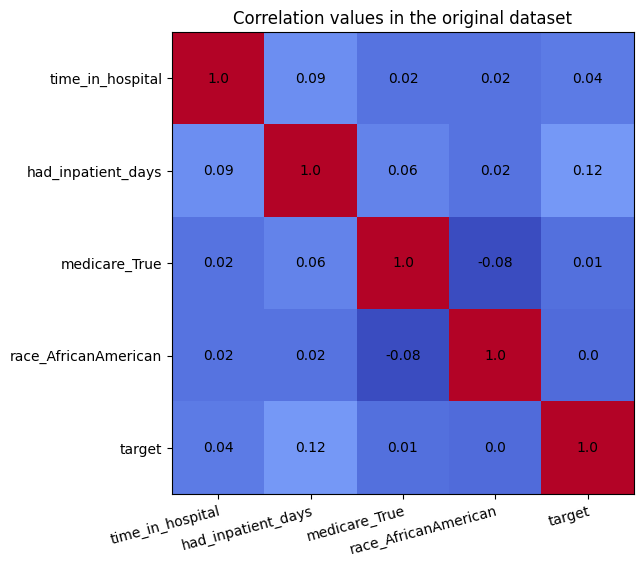

In [6]:
plot_heatmap(X_raw, "Correlation values in the original dataset")

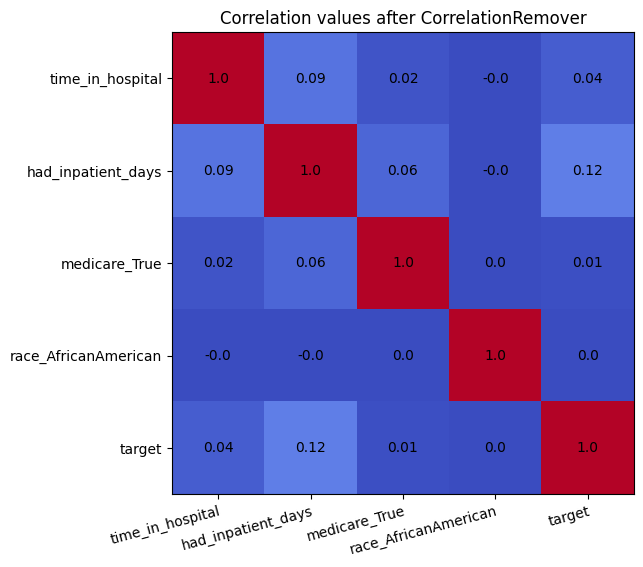

In [7]:
plot_heatmap(X_cr, "Correlation values after CorrelationRemover")

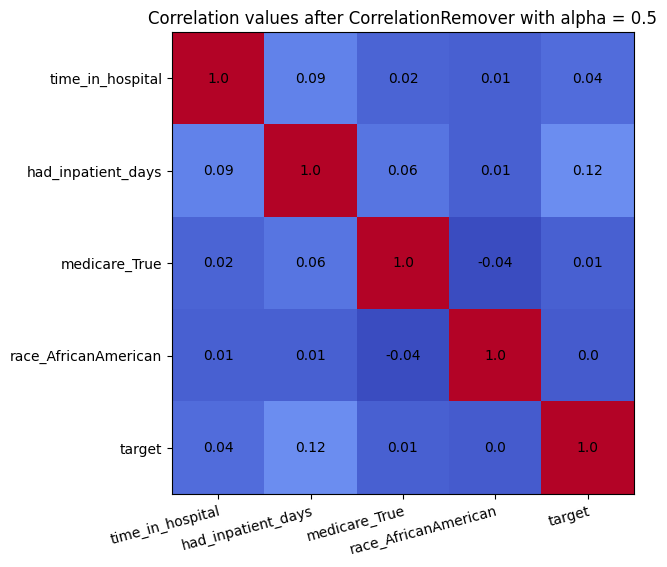

In [8]:
plot_heatmap(X_cr_alpha, "Correlation values after CorrelationRemover with alpha = 0.5")